<a href="https://colab.research.google.com/github/xard40/GameTheory-VX/blob/main/GTheory_NonCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of vx you own: 15
Enter the total number of participants in the current season: 1234
Estimated probability of winning the JP: 10%


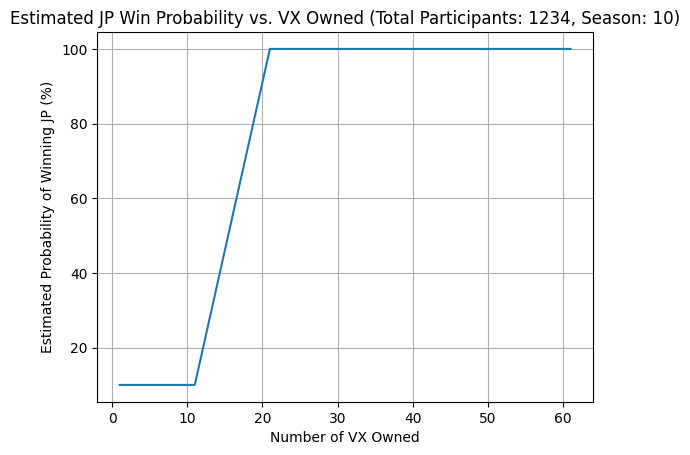

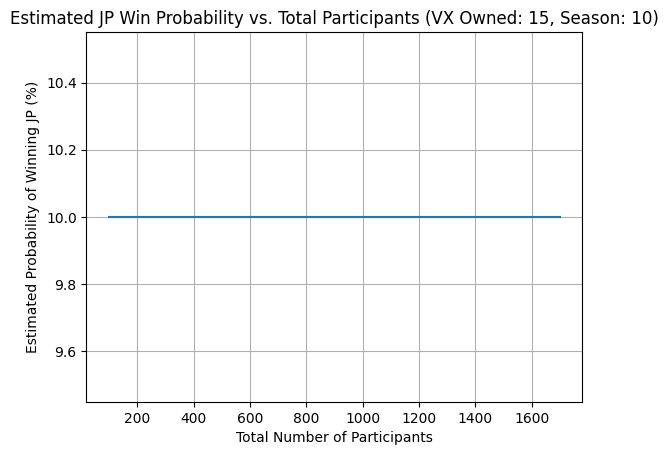

In [ ]:
import matplotlib.pyplot as plt

def calculate_prob_win_jp(vx_owned, total_participants, jackpot_entrants_ratio):
    """
    Calculates the estimated probability of winning the JP based on vx owned,
    total participants, and the jackpot entrants ratio for the current season.

    Args:
        vx_owned (int): The number of vx owned by the player.
        total_participants (int): The total number of unique participants in the current season.
        jackpot_entrants_ratio (float): The ratio of jackpot entrants to total participants
                                       in the current season (from historical data).

    Returns:
        int: The estimated probability of winning the JP (percentage).
    """
    if vx_owned < 20:
        return 10
    elif vx_owned > 20:
        base_prob = 20.0
        weight_vx = vx_owned / 400.0
        weighted_increase_vx = weight_vx * (100.0 / 1000.0)

        participation_factor = jackpot_entrants_ratio * 50.0

        prob_win = int(base_prob + weighted_increase_vx + participation_factor)
        return min(prob_win, 100)
    else:
        return 70

if __name__ == "__main__":
    try:
        vx_owned_input = int(input("Enter the number of vx you own: "))
        total_participants_input = int(input("Enter the total number of participants in the current season: "))

        # You would ideally fetch the actual jackpot entrants ratio for the current season
        # from your historical data. Here's a placeholder based on the charts:
        def get_jackpot_entrants_ratio(season):
            # Rough estimates based on the provided charts (replace with actual data)
            if 1 <= season <= 3:
                return 1800 / 1400  # Roughly
            elif season > 3:
                return 1200 / 400   # Roughly
            else:
                return 0.0

        # For demonstration, let's assume a current season (you'd determine this dynamically)
        current_season = 10
        jackpot_entrants_ratio = get_jackpot_entrants_ratio(current_season)

        if total_participants_input > 0:
            probability = calculate_prob_win_jp(vx_owned_input, total_participants_input, jackpot_entrants_ratio)
            print(f"Estimated probability of winning the JP: {probability}%")

            # --- Iteration for Plotting ---
            vx_owned_range = range(1, vx_owned_input + 50, 10)  # Iterate vx owned
            probabilities = [calculate_prob_win_jp(vx, total_participants_input, jackpot_entrants_ratio) for vx in vx_owned_range]

            plt.plot(vx_owned_range, probabilities)
            plt.xlabel("Number of VX Owned")
            plt.ylabel("Estimated Probability of Winning JP (%)")
            plt.title(f"Estimated JP Win Probability vs. VX Owned (Total Participants: {total_participants_input}, Season: {current_season})")
            plt.grid(True)
            plt.show()

            total_participants_range = range(100, total_participants_input + 500, 100) # Iterate total participants
            probabilities_participants = [calculate_prob_win_jp(vx_owned_input, tp, jackpot_entrants_ratio) for tp in total_participants_range]

            plt.plot(total_participants_range, probabilities_participants)
            plt.xlabel("Total Number of Participants")
            plt.ylabel("Estimated Probability of Winning JP (%)")
            plt.title(f"Estimated JP Win Probability vs. Total Participants (VX Owned: {vx_owned_input}, Season: {current_season})")
            plt.grid(True)
            plt.show()

        else:
            print("Total participants cannot be zero or negative.")

    except ValueError:
        print("Invalid input. Please enter integer values for the number of vx owned and total participants.")

Enter the number of VX you own: 2
Estimated probability of winning the JP: 0.00080710


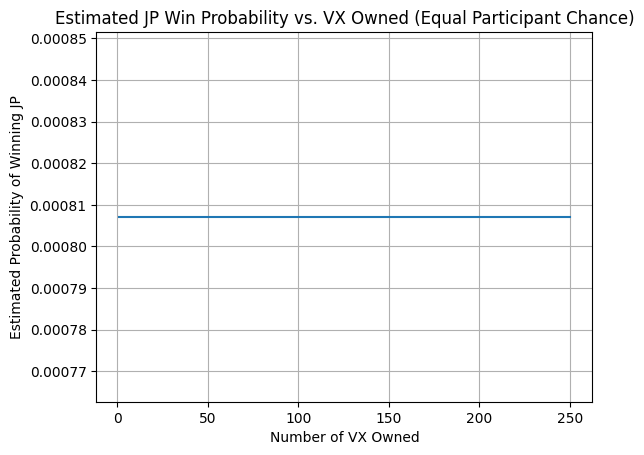

In [ ]:
import matplotlib.pyplot as plt

def calculate_prob_win_jp_v4(vx_owned):
    """
    Calculates the estimated probability of winning the CyberKongz Play & Kollect JP
    assuming each of the participating players has an equal chance of winning,
    regardless of the number of VX they hold.

    Args:
        vx_owned (int): The number of VX owned by the player (this doesn't directly
                          affect the probability in this simplified model).

    Returns:
        float: The estimated probability of winning the JP.
    """
    total_participating_players = 1239
    if total_participating_players > 0:
        probability = 1.0 / total_participating_players
        return probability
    else:
        return 0.0

if __name__ == "__main__":
    try:
        vx_owned_input = int(input("Enter the number of VX you own: "))

        probability = calculate_prob_win_jp_v4(vx_owned_input)
        print(f"Estimated probability of winning the JP: {probability:.8f}")

        # --- Iteration for Plotting (Probability vs. VX Owned - shows constant probability) ---
        vx_owned_range = range(1, 251)  # Iterate through the possible range of VX owned
        probabilities = [calculate_prob_win_jp_v4(vx) for vx in vx_owned_range]

        plt.plot(vx_owned_range, probabilities)
        plt.xlabel("Number of VX Owned")
        plt.ylabel("Estimated Probability of Winning JP")
        plt.title("Estimated JP Win Probability vs. VX Owned (Equal Participant Chance)")
        plt.grid(True)
        plt.show()

    except ValueError:
        print("Invalid input. Please enter an integer value for the number of VX owned.")

Enter the number of VX you own: 250
Estimated probability of winning the JP: 0.00160777


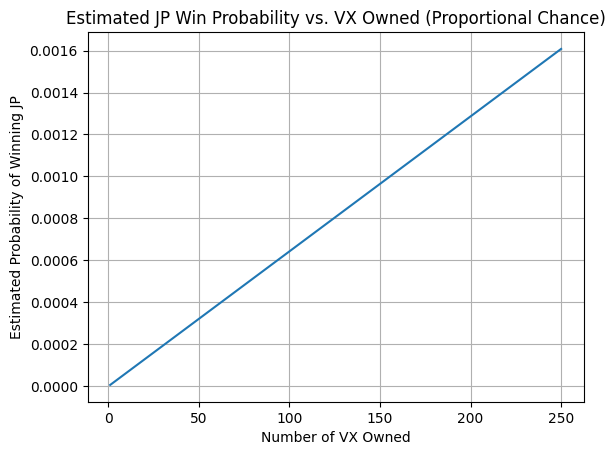

In [ ]:
 import matplotlib.pyplot as plt

def calculate_prob_win_jp_v5(vx_owned):
    """
    Calculates the estimated probability of winning the CyberKongz Play & Kollect JP
    assuming the probability is proportional to the number of VX owned relative
    to the estimated total VX held by all participating players.

    Args:
        vx_owned (int): The number of VX owned by the player.

    Returns:
        float: The estimated probability of winning the JP.
    """
    total_participating_players = 1239
    max_vx_per_player = 250 #suppose to be total number of vx divided by the total holders (stupid calculation)
    min_vx_per_player = 1

    # Rough estimate of the total VX held by participants
    # Using the midpoint of the range as a very simple average
    avg_vx_per_player = (min_vx_per_player + max_vx_per_player) / 2
    estimated_total_vx_participants = total_participating_players * avg_vx_per_player

    if estimated_total_vx_participants > 0:
        probability = vx_owned / estimated_total_vx_participants
        return probability
    else:
        return 0.0

if __name__ == "__main__":
    try:
        vx_owned_input = int(input("Enter the number of VX you own: "))

        probability = calculate_prob_win_jp_v5(vx_owned_input)
        print(f"Estimated probability of winning the JP: {probability:.8f}")

        # --- Iteration for Plotting (Probability vs. VX Owned - should show increasing probability) ---
        vx_owned_range = range(1, 251)  # Iterate through the possible range of VX owned
        probabilities = [calculate_prob_win_jp_v5(vx) for vx in vx_owned_range]

        plt.plot(vx_owned_range, probabilities)
        plt.xlabel("Number of VX Owned")
        plt.ylabel("Estimated Probability of Winning JP")
        plt.title("Estimated JP Win Probability vs. VX Owned (Proportional Chance)")
        plt.grid(True)
        plt.show()

    except ValueError:
        print("Invalid input. Please enter an integer value for the number of VX owned.")

In [ ]:
##however the logic still weird and wrong for fair and randomized Game Theory